In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
# import plotly.graph_objects as go


# from sklearn.ensemble import IsolationForest

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
import seaborn as sns #visualisation


In [3]:
# import data set from the local driver


df1=pd.read_csv('drive/My Drive/Colab Notebooks/train1.csv', sep=';' )# , engine='python')
df2=pd.read_csv('drive/My Drive/Colab Notebooks/train2.csv', sep=';' )
df3=pd.read_csv('drive/My Drive/Colab Notebooks/test1.csv', sep=';' )
df4=pd.read_csv('drive/My Drive/Colab Notebooks/test2.csv', sep=';' )

frames = [df1,df2,df3,df4]
df_concat=pd.concat(frames)
print("The dataset has {} records".format(len(df_concat)))
df_concat.head(5)



The dataset has 995400 records


,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,...,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0,0,0,0
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,...,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0,0,0,0
2,2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,...,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0,0,0,0
3,2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,...,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0,0,0,0
4,2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,...,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0,0,0,0


In [4]:
#df_concat.shape

In [5]:
#df_concat.to_csv(r'/home/jovyan/HAI-HIL dataset.csv',index=False)

In [6]:
# drop the columns that are under attack in each stage.
df1=df_concat.drop(['attack_P1','attack_P2','attack_P3'],axis=1)#, inplace=True)

In [7]:
# make the Timestamp to datetime datatype
df1['time'] = pd.to_datetime(df1['time']) # conveting the date time stamp to the timestamp series
df1.head(2)
# # df1.shape

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,...,57.8704,0,395.0195,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,...,58.4853,0,398.3109,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0


In [8]:
df1.fillna(method = 'ffill', inplace = True)

In [9]:
# a Timestamp as index
df1= df1.set_index('time')
df1.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,0.2838,...,57.8704,0,395.0195,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0
2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,0.2838,...,58.4853,0,398.3109,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0
2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,0.2914,...,59.2629,0,397.8768,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0
2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,0.2762,...,59.8235,0,398.6364,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0
2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,0.2838,...,60.3118,0,401.2406,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0


##### Interpolation the data with each time stamp  

In [10]:
# resample the data with 5 second
df1=df1.resample('10s').mean()
df1.interpolate(method='polynomial',order=2)
df1.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.0983,1.07405,399.2321,1110.3986,32.0,0.00000,31.08367,35.75245,0.0,0.28380,...,60.467320,0.0,400.689000,0.000210,333.58289,331.23010,50.9871,9973.0,27629.0,0.0
2019-09-11 20:00:10,0.0983,1.08657,399.2321,1110.3986,32.0,0.00000,31.48092,35.79418,0.0,0.28380,...,64.462150,0.0,408.279090,-0.001310,339.67195,335.58666,50.9871,9973.0,27628.8,0.0
2019-09-11 20:00:20,0.0983,1.09949,399.2321,1110.3986,32.0,0.00143,31.58027,35.83725,0.0,0.28457,...,66.566305,0.0,411.836305,0.000230,343.20929,339.41515,50.9871,9973.0,27629.0,0.0
2019-09-11 20:00:30,0.0983,1.10940,399.2321,1110.3986,32.0,0.00138,33.26852,35.87025,0.0,0.28380,...,67.838547,0.0,413.989272,-0.000255,344.94901,342.40994,50.9871,9959.1,27628.8,0.0
2019-09-11 20:00:40,0.0983,1.11291,399.2321,1110.3986,32.0,0.00047,31.58025,35.88196,0.0,0.28380,...,68.458830,0.0,412.418640,0.001530,343.70298,343.36300,50.9871,9951.8,27629.0,0.0


In [11]:
df1.shape

(480060, 60)

In [12]:
# Count NaN values of whole DataFrame
nan_count = df1.isna().sum()#.sum()
print(nan_count )

P1_B2004      380520
P1_B2016      380520
P1_B3004      380520
P1_B3005      380520
P1_B4002      380520
P1_B4005      380520
P1_B400B      380520
P1_B4022      380520
P1_FCV01D     380520
P1_FCV01Z     380520
P1_FCV02D     380520
P1_FCV02Z     380520
P1_FCV03D     380520
P1_FCV03Z     380520
P1_FT01       380520
P1_FT01Z      380520
P1_FT02       380520
P1_FT02Z      380520
P1_FT03       380520
P1_FT03Z      380520
P1_LCV01D     380520
P1_LCV01Z     380520
P1_LIT01      380520
P1_PCV01D     380520
P1_PCV01Z     380520
P1_PCV02D     380520
P1_PCV02Z     380520
P1_PIT01      380520
P1_PIT02      380520
P1_TIT01      380520
P1_TIT02      380520
P2_24Vdc      380520
P2_Auto       380520
P2_Emgy       380520
P2_On         380520
P2_SD01       380520
P2_SIT01      380520
P2_TripEx     380520
P2_VT01e      380520
P2_VXT02      380520
P2_VXT03      380520
P2_VYT02      380520
P2_VYT03      380520
P3_LCP01D     380520
P3_LCV01D     380520
P3_LH         380520
P3_LL         380520
P3_LT01      

In [13]:
df1.fillna(method = 'ffill', inplace = True)

In [14]:
df1.shape

(480060, 60)

#### Visualize the dataset
-  Plotting the number of normal and Attack transactions in the dataset.  

None


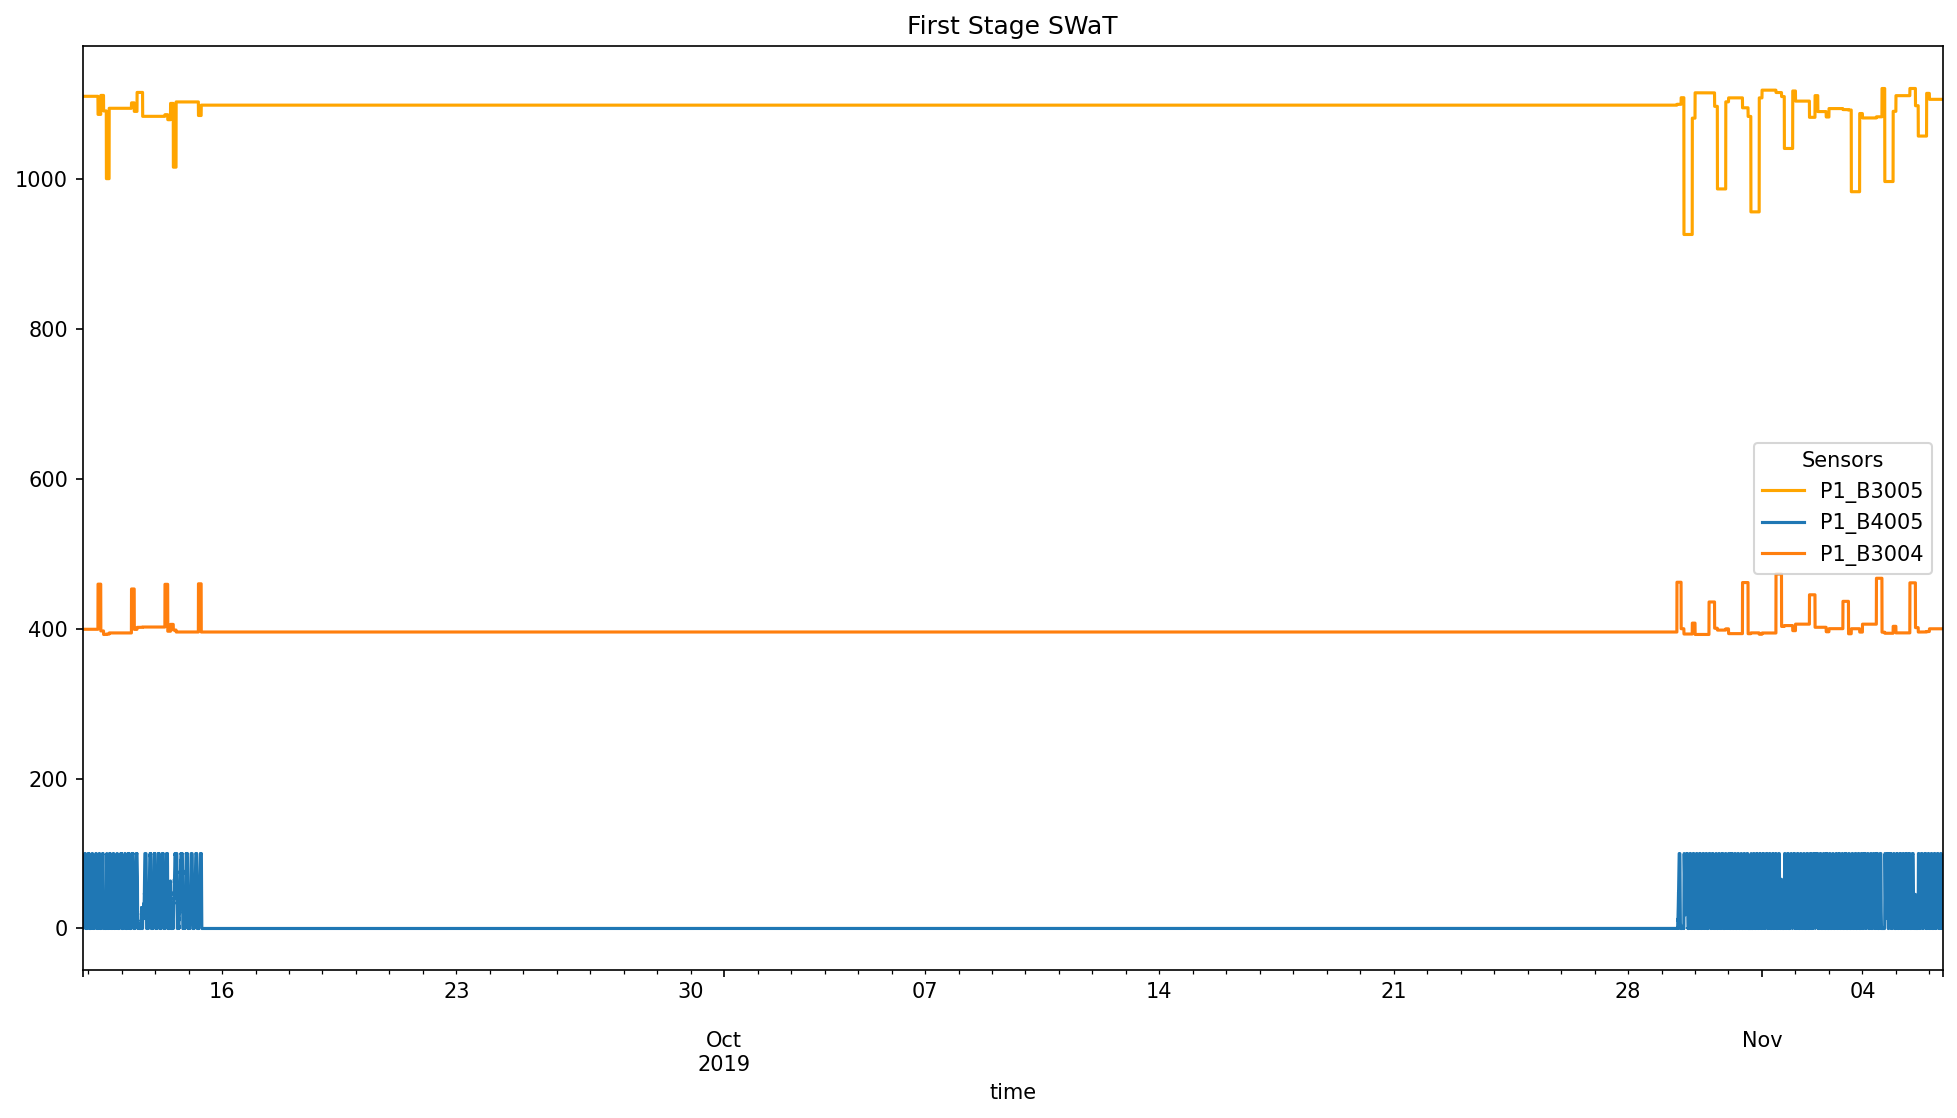

In [15]:
# Visualizing The first stage with respect to time series
def plot ():
    plt.figure(figsize=(16, 8), dpi=150)
    df1['P1_B3005'].plot(label='P1_B3005', color='orange')
    df1['P1_B4005'].plot(label='P1_B4005')
    df1['P1_B3004'].plot(label='P1_B3004')
    # adding title to the plot
    plt.title('First Stage SWaT')
    # adding Label to the x-axis
    plt.xlabel('time')
    # adding legend to the curve
    plt.legend(title='Sensors')

print (plot ())


In [16]:
# make the class label into 2 since during sampling and interpolation it create the new class labels
df1.loc[df1['attack'] >= 0.1, 'lablel'] = 1
df1.loc[df1['attack'] ==0.0, 'lablel'] = 0

In [17]:
# fill the missing values with forward and backward of the cols

df1=df1.fillna(method="ffill")

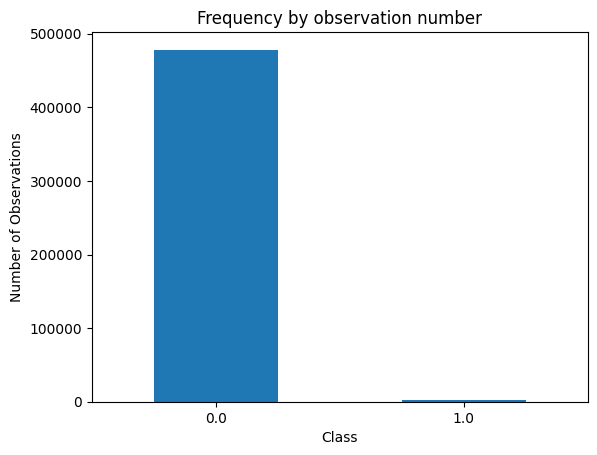

In [18]:
#Visualizing the imbalanced dataset
count_classes2 = pd.value_counts(df1['lablel'], sort = True)
count_classes2.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df1['lablel'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [19]:
df1.shape

(480060, 61)

In [20]:
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame with features and target variable
X = df1.drop('lablel', axis=1)
y = df1['lablel']

# Create SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df_resampled.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,lablel
0,0.0983,1.07405,399.2321,1110.3986,32.0,0.00000,31.08367,35.75245,0.0,0.28380,...,0.0,400.689000,0.000210,333.58289,331.23010,50.9871,9973.0,27629.0,0.0,0.0
1,0.0983,1.08657,399.2321,1110.3986,32.0,0.00000,31.48092,35.79418,0.0,0.28380,...,0.0,408.279090,-0.001310,339.67195,335.58666,50.9871,9973.0,27628.8,0.0,0.0
2,0.0983,1.09949,399.2321,1110.3986,32.0,0.00143,31.58027,35.83725,0.0,0.28457,...,0.0,411.836305,0.000230,343.20929,339.41515,50.9871,9973.0,27629.0,0.0,0.0
3,0.0983,1.10940,399.2321,1110.3986,32.0,0.00138,33.26852,35.87025,0.0,0.28380,...,0.0,413.989272,-0.000255,344.94901,342.40994,50.9871,9959.1,27628.8,0.0,0.0
4,0.0983,1.11291,399.2321,1110.3986,32.0,0.00047,31.58025,35.88196,0.0,0.28380,...,0.0,412.418640,0.001530,343.70298,343.36300,50.9871,9951.8,27629.0,0.0,0.0


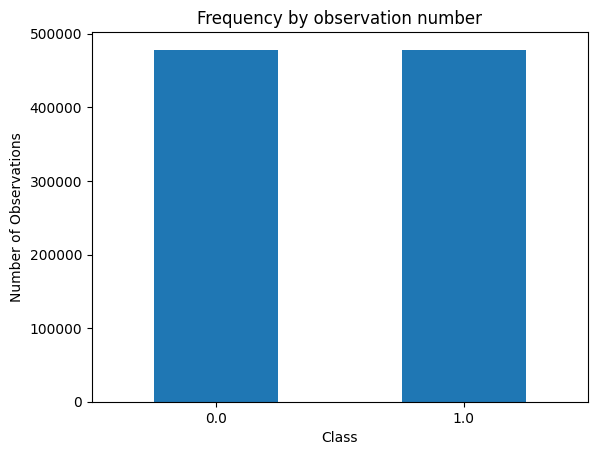

In [21]:
#Visualizing the balanced dataset
count_classes2 = pd.value_counts(df_resampled['lablel'], sort = True)
count_classes2.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df_resampled['lablel'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [22]:
df_resampled.isna().sum()

P1_B2004      0
P1_B2016      0
P1_B3004      0
P1_B3005      0
P1_B4002      0
             ..
P4_ST_PS      0
P4_ST_PT01    0
P4_ST_TT01    0
attack        0
lablel        0
Length: 61, dtype: int64

In [23]:
#Count 1 unique values in each columns
df2=df_resampled.nunique().reset_index()
df2.columns = ['feature','number Of unique']
df2[df2['number Of unique']==1]

,feature,number Of unique
32,P2_Auto,1
33,P2_Emgy,1
34,P2_On,1
37,P2_TripEx,1
45,P3_LH,1
46,P3_LL,1
51,P4_HT_PS,1


In [25]:
# drop the  cols
#df1= df1.drop('P2_Auto','P2_Emgy','P2_On','P2_TripEx','P3_LH','P3_LL','P4_HT_PS', axis=0)

# drop two columns name is 'C' and 'D'
df1=df_resampled.drop(['P2_Auto','P2_Emgy','P2_On','P2_TripEx','P3_LH','P3_LL','P4_HT_PS','attack'], axis=1)

In [26]:
import seaborn as sns


#get correlations of each features in dataset
c = df1.corr()
top_corr_features = c.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [27]:
c=c.lablel.sort_values(ascending=False).head(42).keys().drop('lablel') # corelation
print(c)

Index(['P1_B2004', 'P1_B2016', 'P1_PCV01Z', 'P1_PCV01D', 'P4_ST_LD',
       'P4_ST_PO', 'P4_LD', 'P3_LCV01D', 'P1_B3004', 'P4_HT_LD', 'P4_HT_PO',
       'P4_ST_FD', 'P1_PIT01', 'P1_FT01', 'P1_FT01Z', 'P4_ST_PT01', 'P1_FT02Z',
       'P1_B400B', 'P1_B4005', 'P1_FCV01D', 'P1_FT02', 'P1_FCV01Z', 'P1_PIT02',
       'P1_FCV03D', 'P1_FCV03Z', 'P1_LIT01', 'P1_PCV02Z', 'P1_PCV02D',
       'P4_HT_FD', 'P1_LCV01D', 'P1_LCV01Z', 'P1_B3005', 'P1_FT03', 'P1_FT03Z',
       'P4_ST_PS', 'P1_B4022', 'P1_FCV02D', 'P1_FCV02Z', 'P1_B4002',
       'P3_LCP01D', 'P1_TIT02'],
      dtype='object')


In [28]:
# Select Multiple Columns
df2 = df1.loc[:,['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02D', 'P1_FT01', 'P1_PCV01D',
       'P1_PCV01Z', 'P1_PCV02Z', 'P1_B2016', 'P1_B2004', 'P1_FT01Z',
       'P4_ST_LD', 'P4_ST_PO', 'P4_LD', 'P3_LCV01D', 'P1_PIT01', 'P4_ST_PT01',
       'P4_HT_PO', 'P4_HT_LD', 'P1_B400B', 'P1_FT02Z', 'P1_B4005', 'P1_FT02',
       'P4_ST_FD', 'P1_PIT02', 'P1_FCV01D', 'P1_FCV01Z', 'P1_B3004',
       'P4_HT_FD', 'P1_LIT01', 'P1_B3005', 'P4_ST_PS', 'P1_FT03', 'P1_FT03Z',
       'P1_FCV02Z', 'P1_FCV02D', 'P1_LCV01Z', 'P2_VYT02', 'P1_LCV01D',
       'P3_LCP01D', 'P2_VXT02', 'P2_VXT03','lablel']]

In [29]:
df2.shape

(956406, 42)

In [30]:
#To see how the data is spread betwen Attack and Normal
#print(df1.groupby('Normal/Attack')['Normal/Attack'].count())
print(df2.groupby('lablel')['lablel'].count())

lablel
0.0    478203
1.0    478203
Name: lablel, dtype: int64


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956406 entries, 0 to 956405
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   P1_FCV03D   956406 non-null  float64
 1   P1_FCV03Z   956406 non-null  float64
 2   P1_PCV02D   956406 non-null  float64
 3   P1_FT01     956406 non-null  float64
 4   P1_PCV01D   956406 non-null  float64
 5   P1_PCV01Z   956406 non-null  float64
 6   P1_PCV02Z   956406 non-null  float64
 7   P1_B2016    956406 non-null  float64
 8   P1_B2004    956406 non-null  float64
 9   P1_FT01Z    956406 non-null  float64
 10  P4_ST_LD    956406 non-null  float64
 11  P4_ST_PO    956406 non-null  float64
 12  P4_LD       956406 non-null  float64
 13  P3_LCV01D   956406 non-null  float64
 14  P1_PIT01    956406 non-null  float64
 15  P4_ST_PT01  956406 non-null  float64
 16  P4_HT_PO    956406 non-null  float64
 17  P4_HT_LD    956406 non-null  float64
 18  P1_B400B    956406 non-null  float64
 19  P1

#### Normalize using min Max scaler  

In [32]:
con_feats = ['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02D', 'P1_FT01', 'P1_PCV01D',
       'P1_PCV01Z', 'P1_PCV02Z', 'P1_B2016', 'P1_B2004', 'P1_FT01Z',
       'P4_ST_LD', 'P4_ST_PO', 'P4_LD', 'P3_LCV01D', 'P1_PIT01', 'P4_ST_PT01',
       'P4_HT_PO', 'P4_HT_LD', 'P1_B400B', 'P1_FT02Z', 'P1_B4005', 'P1_FT02',
       'P4_ST_FD', 'P1_PIT02', 'P1_FCV01D', 'P1_FCV01Z', 'P1_B3004',
       'P4_HT_FD', 'P1_LIT01', 'P1_B3005', 'P4_ST_PS', 'P1_FT03', 'P1_FT03Z',
       'P1_FCV02Z', 'P1_FCV02D', 'P1_LCV01Z', 'P2_VYT02', 'P1_LCV01D',
       'P3_LCP01D', 'P2_VXT02', 'P2_VXT03']
scaler = MinMaxScaler()
df2[con_feats] = scaler.fit_transform(df2[con_feats])
df2.head()

,P1_FCV03D,P1_FCV03Z,P1_PCV02D,P1_FT01,P1_PCV01D,P1_PCV01Z,P1_PCV02Z,P1_B2016,P1_B2004,P1_FT01Z,...,P1_FT03Z,P1_FCV02Z,P1_FCV02D,P1_LCV01Z,P2_VYT02,P1_LCV01D,P3_LCP01D,P2_VXT02,P2_VXT03,lablel
0,0.536616,0.539309,0.0,0.180830,0.352099,0.356178,0.028506,0.490436,0.950413,0.384264,...,0.754679,0.988517,1.0,0.194136,0.620610,0.202264,0.036996,0.771454,0.733314,0.0
1,0.537849,0.534032,0.0,0.178111,0.352490,0.356178,0.028506,0.496751,0.950413,0.378271,...,0.751741,0.988393,1.0,0.194144,0.647756,0.205656,0.022418,0.776781,0.740860,0.0
2,0.538619,0.534032,0.0,0.178158,0.353796,0.356178,0.028450,0.503268,0.950413,0.377282,...,0.751524,0.988417,1.0,0.194230,0.662736,0.208105,0.013611,0.772722,0.749199,0.0
3,0.539284,0.534024,0.0,0.192679,0.357778,0.356178,0.028506,0.508266,0.950413,0.402529,...,0.751330,0.988331,1.0,0.205008,0.651339,0.210262,0.008256,0.745104,0.730097,0.0
4,0.538791,0.534138,0.0,0.194073,0.361851,0.356178,0.028450,0.510037,0.950413,0.413173,...,0.752237,0.988324,1.0,0.205046,0.632927,0.210009,0.004981,0.746246,0.728304,0.0


In [ ]:
# # Taking a random sample of 20% of the data
# df2 = df2.sample(frac=0.1, random_state=42)
# df2.shape

#### Split the Data to train and Test  

In [33]:
# split the normal data with respect to test and Train
from sklearn.model_selection import train_test_split
x_good_train, x_good_test = train_test_split(df2, test_size=0.2, random_state=42)

In [34]:
print(x_good_train.shape)
print(x_good_test.shape)

(765124, 42)
(191282, 42)


In [35]:
# Training and testing with removing the class
x_good_train = x_good_train[x_good_train.lablel == 0.0] #where normal transactions
x_good_train = x_good_train.drop(['lablel'], axis=1) #drop the class columns

test_y = x_good_test['lablel'] # save the class column for the test set
x_good_test = x_good_test.drop(['lablel'], axis=1) #drop the class column

x_good_train = x_good_train.values #transform to ndarray
x_good_test = x_good_test.values
x_good_train.shape, x_good_test.shape #,x_good_train.shape,test_y.shape

((382578, 41), (191282, 41))

#### Build Model   

In [36]:
#########
#Define the autoencoder model
#Since we're dealing with numeric values we can use only Dense layers.

from sklearn import metrics
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Input, Dense
from keras import regularizers
from keras.models import Model, load_model
import datetime

In [37]:
#TIME_STEPS = 288
model = Sequential()
# encoder
model.add(Dense(41, input_dim=x_good_train.shape[1], activation='sigmoid')) # Input layers or encoder sigmoid relu
Dropout(0.01),
model.add(Dense(128, activation='sigmoid')) ##
Dropout(0.01),
# model.add(Dense(32, activation='relu')) ##
# Dropout(0.1),

# model.add(Dense(41, activation='sigmoid')) ## decoder
# Dropout(0.1),
model.add(Dense(x_good_train.shape[1])) # output layers
model.compile(loss='msle',metrics=['accuracy'],optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 41)                1722      
                                                                 
 dense_1 (Dense)             (None, 128)               5376      
                                                                 
 dense_2 (Dense)             (None, 41)                5289      
                                                                 
Total params: 12,387
Trainable params: 12,387
Non-trainable params: 0
_________________________________________________________________


### Train the model
Please note that we are using x_good_test as both the input and the target since this is a reconstruction model.

In [38]:
#model.fit(x_good_train,x_good_train,verbose=1,epochs=100)
grid=model.fit(
    x_good_train,x_good_train,
    verbose=2,
    epochs=30,
    batch_size=64,
    validation_data=(x_good_test, x_good_test),
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ])
score=model.evaluate(x_good_test, x_good_test, verbose=1)
print('Test loss:', score[0])
print('accuracy:', score[1])

Epoch 1/30
5978/5978 - 19s - loss: 0.0384 - accuracy: 0.6994 - val_loss: 0.0563 - val_accuracy: 0.1529 - 19s/epoch - 3ms/step
Epoch 2/30
5978/5978 - 22s - loss: 0.0370 - accuracy: 0.7639 - val_loss: 0.0562 - val_accuracy: 0.6121 - 22s/epoch - 4ms/step
Epoch 3/30
5978/5978 - 17s - loss: 0.0369 - accuracy: 0.8354 - val_loss: 0.0561 - val_accuracy: 0.6132 - 17s/epoch - 3ms/step
Epoch 4/30
5978/5978 - 16s - loss: 0.0340 - accuracy: 0.8714 - val_loss: 0.0458 - val_accuracy: 0.6196 - 16s/epoch - 3ms/step
Epoch 5/30
5978/5978 - 17s - loss: 0.0317 - accuracy: 0.8974 - val_loss: 0.0457 - val_accuracy: 0.6966 - 17s/epoch - 3ms/step
Epoch 6/30
5978/5978 - 16s - loss: 0.0317 - accuracy: 0.9038 - val_loss: 0.0456 - val_accuracy: 0.6115 - 16s/epoch - 3ms/step
Epoch 7/30
5978/5978 - 19s - loss: 0.0268 - accuracy: 0.9039 - val_loss: 0.0362 - val_accuracy: 0.7052 - 19s/epoch - 3ms/step
Epoch 8/30
5978/5978 - 16s - loss: 0.0239 - accuracy: 0.9063 - val_loss: 0.0362 - val_accuracy: 0.6773 - 16s/epoch - 3

#### Plot training and test loss  

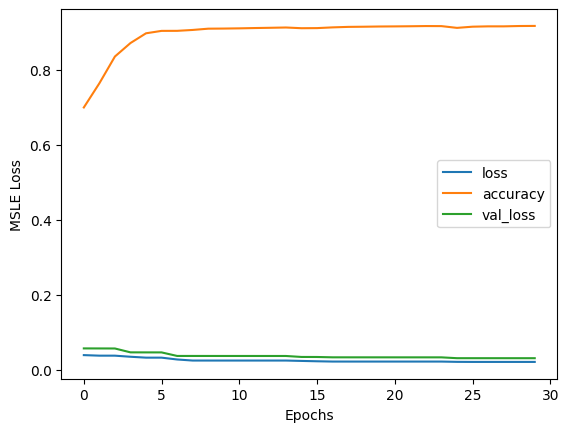

In [39]:
plt.plot(grid.history['loss'])
plt.plot(grid.history['accuracy'])
plt.plot(grid.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss','accuracy', 'val_loss'])
plt.show()

### Detect Anomalies on test data  
- Anomalies are data points where the reconstruction loss is higher
- To calculate the reconstruction loss on test data, predict the test data and calculate the mean square error between the test data and the reconstructed test data.

#### Predictions and Computing Reconstruction Error  

In [40]:
test_x_predictions = model.predict(x_good_test)#,verbose=1)
mse = np.mean(np.power(x_good_test - test_x_predictions,2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,'A': test_y}, index=test_y.index)
error_df.head()

5978/5978 [==============================] - 10s 2ms/step


,Reconstruction_error,A
368827,0.085738,0.0
764619,0.167297,1.0
884707,0.127790,1.0
501153,0.237615,1.0
158833,0.085738,0.0


In [41]:
# find the maximum of each column using reconstruction error
maxValues = error_df.max()

print(maxValues)

Reconstruction_error    0.524125
A                       1.000000
dtype: float64


In [42]:

# To identify the maximum and minimum data point for identifying bins
import tensorflow as tf
# reconstruction loss for normal test data
#reconstructions = model.predict(normal_test_data)
train_loss1 = tf.keras.losses.mse(test_x_predictions, x_good_test)


trainloss1=pd.DataFrame(train_loss1)
#trainloss.describe()
#trainloss.to_csv(r'/home/jovyan/trainloss.csv',index=False)
trainloss1.describe()


,0
count,191282.000000
mean,0.165739
std,0.094399
min,0.072736
25%,0.085738
50%,0.133749
75%,0.210302
max,0.524125


Text(0.5, 1.0, 'bins - loss distribution = 29')

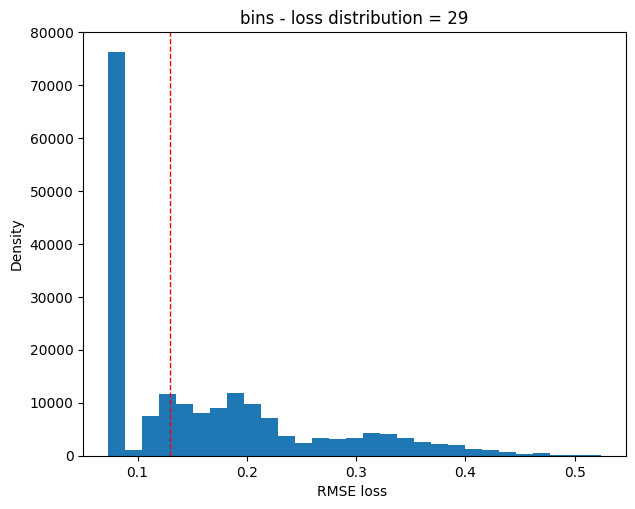

In [43]:
# rules-of-thumb to identify the number of bins Freedman–Diaconis rule
trainloss1=pd.DataFrame(trainloss1)
q1 = trainloss1.quantile(0)
q3 = trainloss1.quantile(1)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(trainloss1) ** (1 / 3))
bin_count = int(np.ceil((trainloss1.max() - trainloss1.min()) / bin_width))
fig = plt.figure(figsize=(7,5.5))
plt.hist(train_loss1, bins = bin_count)

plt.axvline(0.13,0, 9000,color='red', linestyle='dashed', linewidth=1)
plt.xlabel('RMSE loss ')
plt.ylabel('Density')
plt.title(f'bins - loss distribution = {bin_count}')

### Model Interpretability  

In [44]:
# change X_tes_scaled to pandas dataframe
data_n = pd.DataFrame(x_good_test, index= test_y.index)#, columns=numerical_cols)

In [45]:
def compute_error_per_dim(point):

    initial_pt = np.array(data_n.loc[point,:]).reshape(1,9)
    reconstrcuted_pt = model.predict(initial_pt)

    return abs(np.array(initial_pt - reconstrcuted_pt)[0])

In [54]:
outliers = error_df.index[error_df.Reconstruction_error > 0.1].tolist()
number_of_outliers = len(outliers)
print("Number of elements in the anomalies: ", number_of_outliers)

Number of elements in the anomalies:  114458


<Figure size 1800x1000 with 0 Axes>

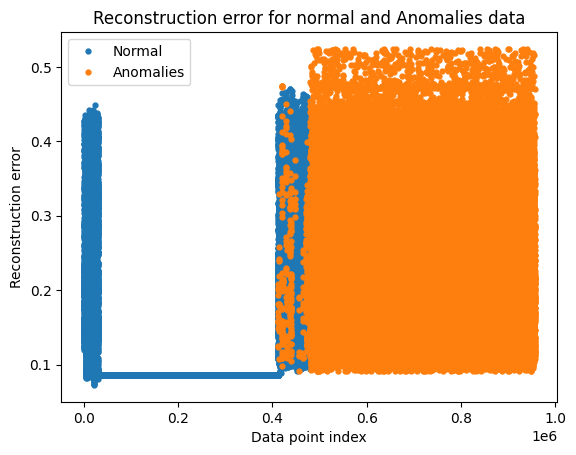

In [55]:
plt.figure(figsize=(18,10))
threshold_fixed = 0.1
groups = error_df.groupby('A')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Anomalies" if name == 1 else "Normal")
#ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and Anomalies data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

#### Calculate RMSE and MAE   

In [56]:
# Define a function to calculate MAE and RMSE
errors = test_x_predictions - x_good_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()

print('The performance  of autoencoder'+ ':')
print('')
print('Mean Absolute Error: {:.4f}'.format(mae))
print('Mean Square Error:{:.4f}' .format(mse))
print('Root Mean Square Error: {:.4f}'.format(rmse))
print('')

The performance  of autoencoder:

Mean Absolute Error: 0.2257
Mean Square Error:0.1657
Root Mean Square Error: 0.4071



### confusion_matrix

In [59]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
threshold_fixed = 0.11
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.A, pred_y)
plt.figure(figsize=(4, 4))

print(conf_matrix)
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df['A'], error_df['pred']))
print(" Recall: ",recall_score(error_df['A'], error_df['pred']))
print(" Precision: ",precision_score(error_df['A'], error_df['pred']))
print(classification_report(error_df['A'], error_df['pred']))

[[77249 18376]
 [ 1934 93723]]
 Accuracy:  0.8938216873516588
 Recall:  0.979781929184482
 Precision:  0.8360734707713717
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.88     95625
         1.0       0.84      0.98      0.90     95657

    accuracy                           0.89    191282
   macro avg       0.91      0.89      0.89    191282
weighted avg       0.91      0.89      0.89    191282



<Figure size 400x400 with 0 Axes>

In [60]:
from sklearn.metrics import precision_score, recall_score
# Calculate precision
precision = precision_score(error_df['A'], error_df['pred'])

# Calculate recall
recall = recall_score(error_df['A'], error_df['pred'])

# Print the precision and recall scores
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8360734707713717
Recall: 0.979781929184482


#### Mean p-Powered Error for auto encoder
- To enhance the perfomance of reall and precision   

In [64]:
test_x_predictions2 = model.predict(x_good_test)#,verbose=1)
mse = np.mean(np.power(x_good_test - test_x_predictions2, 4), axis=1)
error_df_mean_power = pd.DataFrame({'Reconstruction_error': mse,'A': test_y}, index=test_y.index)
error_df_mean_power.head()

5978/5978 [==============================] - 10s 2ms/step


,Reconstruction_error,A
368827,0.039755,0.0
764619,0.179687,1.0
884707,0.080989,1.0
501153,0.228193,1.0
158833,0.039755,0.0


In [65]:
error_df_mean_power.head()

,Reconstruction_error,A
368827,0.039755,0.0
764619,0.179687,1.0
884707,0.080989,1.0
501153,0.228193,1.0
158833,0.039755,0.0


In [66]:
# find the maximum of each column using reconstruction error
maxValues2 = error_df_mean_power.max()

print(maxValues2)

Reconstruction_error    0.817415
A                       1.000000
dtype: float64


In [67]:

# To identify the maximum and minimum data point for identifying bins
import tensorflow as tf
# reconstruction loss for normal test data
#reconstructions = model.predict(normal_test_data)
train_loss2 = tf.keras.losses.mse(test_x_predictions2, x_good_test)


trainloss2=pd.DataFrame(train_loss2)
#trainloss.describe()
#trainloss.to_csv(r'/home/jovyan/trainloss.csv',index=False)
trainloss1.describe()


,0
count,191282.000000
mean,0.165739
std,0.094399
min,0.072736
25%,0.085738
50%,0.133749
75%,0.210302
max,0.524125


In [74]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
threshold_fixed = 0.1
pred_y = [1 if e > threshold_fixed else 0 for e in error_df_mean_power.Reconstruction_error.values]
error_df_mean_power['pred'] =pred_y
conf_matrix = confusion_matrix(error_df_mean_power.A, pred_y)
plt.figure(figsize=(4, 4))

print(conf_matrix)
# sns.heatmap(conf_matrix, xticklabels=df1.A, yticklabels=df1.A, annot=True, fmt="d");
# plt.title("Confusion matrix")
# plt.ylabel('True class')
# plt.xlabel('Predicted class')
# plt.show()

# print classification report
#print(classification_report(error_df.A, pred_y)

# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df_mean_power['A'], error_df_mean_power['pred']))
print(" Recall: ",recall_score(error_df_mean_power['A'], error_df_mean_power['pred']))
print(" Precision: ",precision_score(error_df_mean_power['A'], error_df_mean_power['pred']))
# print classification report
print(classification_report(error_df_mean_power['A'], error_df_mean_power['pred']))

[[79616 16009]
 [19819 75838]]
 Accuracy:  0.8126953921435368
 Recall:  0.7928118172219493
 Precision:  0.8256992607270788
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82     95625
         1.0       0.83      0.79      0.81     95657

    accuracy                           0.81    191282
   macro avg       0.81      0.81      0.81    191282
weighted avg       0.81      0.81      0.81    191282



<Figure size 400x400 with 0 Axes>

#### Mean p-Powered Error for auto encoder
- To enhance the perfomance of reall and precision    

In [ ]:
test_x_predictions = model.predict(x_good_test)#,verbose=1)
mse = np.mean(np.power(x_good_test - test_x_predictions, 4), axis=1)
error_df_mean_power = pd.DataFrame({'Reconstruction_error': mse,'A': test_y}, index=test_y.index)
error_df_mean_power.head()